In [1]:
from langgraph.graph import MessagesState
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage, RemoveMessage
from langgraph.graph import StateGraph, START
from langgraph.checkpoint.memory import InMemorySaver

/home/rishukumar/Documents/CampusX/CampusX_Code/LangGraph_CampusX/myenv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
load_dotenv()

True

In [3]:
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)

E0000 00:00:1767808531.085460    7313 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [4]:
class ChatState(MessagesState):
    summary: str

In [6]:
def summarize_conversation(state: ChatState):

    existing_summary = state["summary"]

    # Build summarization prompt
    if existing_summary:
        prompt = (
            f"Existing summary:\n{existing_summary}\n\n"
            "Extend the summary using the new conversation above."
        )
    else:
        prompt = "Summarize the conversation above."

    messages_for_summary = state["messages"] + [
        HumanMessage(content=prompt)
    ]

    response = model.invoke(messages_for_summary)

    # Keep only last 2 messages verbatim
    messages_to_delete = state["messages"][:-2]

    return {
        "summary": response.content,
        "messages": [RemoveMessage(id=m.id) for m in messages_to_delete],
    }

In [5]:
def chat_node(state: ChatState):
    messages = []

    if state["summary"]:
        messages.append({
            "role": "system",
            "content": f"Conversation summary:\n{state['summary']}"
        })

    messages.extend(state["messages"])

    print(messages)

    response = model.invoke(messages)
    return {"messages": [response]}

In [7]:
def should_summarize(state: ChatState):
    return len(state["messages"]) > 6

In [8]:
builder = StateGraph(ChatState)

builder.add_node("chat", chat_node)
builder.add_node("summarize", summarize_conversation)

builder.add_edge(START, "chat")

builder.add_conditional_edges(
    "chat",
    should_summarize,
    {
        True: "summarize",
        False: "__end__",
    }
)
builder.add_edge("summarize", "__end__")

In [9]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

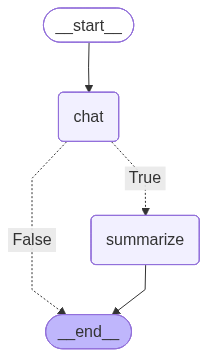

In [10]:
graph

In [11]:
config = {"configurable": {"thread_id": "t1"}}

def run_turn(text: str):
    out = graph.invoke({"messages": [HumanMessage(content=text)], "summary": ""}, config=config)
    return out

In [12]:
# gives the current version of the state
def show_state():
    snap = graph.get_state(config)
    vals = snap.values
    print("\n--- STATE ---")
    print("summary:", vals.get("summary", ""))
    print("num_messages:", len(vals.get("messages", [])))
    print("messages:")
    for m in vals.get("messages", []):
        print("-", type(m).__name__, ":", m.content[:80])

In [13]:
run_turn('Quantum Physics')
show_state()

[HumanMessage(content='Quantum Physics', additional_kwargs={}, response_metadata={}, id='8c433b30-8c53-4d19-a684-f4f76f9ff6f0')]


Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')



--- STATE ---
summary: 
num_messages: 2
messages:
- HumanMessage : Quantum Physics
- AIMessage : Quantum Physics, also known as Quantum Mechanics, is a fundamental theory in phy


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTP

In [14]:
run_turn('How is Albert Einstien related?')
show_state()

[HumanMessage(content='Quantum Physics', additional_kwargs={}, response_metadata={}, id='8c433b30-8c53-4d19-a684-f4f76f9ff6f0'), AIMessage(content='Quantum Physics, also known as Quantum Mechanics, is a fundamental theory in physics that describes the physical properties of nature at the scale of atoms and subatomic particles. It\'s a radical departure from classical physics (like Newton\'s laws or Maxwell\'s electromagnetism) because it introduces concepts that challenge our everyday intuition about how the world works.\n\nHere are the core ideas and phenomena that define Quantum Physics:\n\n1.  **Quantization of Energy:**\n    *   Unlike classical physics where energy, momentum, and other properties can take on any continuous value, in quantum mechanics, these properties exist in discrete "packets" or "quanta."\n    *   For example, light energy comes in discrete packets called **photons**. An electron in an atom can only occupy specific energy levels; it can\'t be in between. This i

In [15]:
run_turn('What are some of Einstien"s fampus work')
show_state()

[HumanMessage(content='Quantum Physics', additional_kwargs={}, response_metadata={}, id='8c433b30-8c53-4d19-a684-f4f76f9ff6f0'), AIMessage(content='Quantum Physics, also known as Quantum Mechanics, is a fundamental theory in physics that describes the physical properties of nature at the scale of atoms and subatomic particles. It\'s a radical departure from classical physics (like Newton\'s laws or Maxwell\'s electromagnetism) because it introduces concepts that challenge our everyday intuition about how the world works.\n\nHere are the core ideas and phenomena that define Quantum Physics:\n\n1.  **Quantization of Energy:**\n    *   Unlike classical physics where energy, momentum, and other properties can take on any continuous value, in quantum mechanics, these properties exist in discrete "packets" or "quanta."\n    *   For example, light energy comes in discrete packets called **photons**. An electron in an atom can only occupy specific energy levels; it can\'t be in between. This i

In [16]:
run_turn('Explain special theory of relativity')
show_state()

[HumanMessage(content='Quantum Physics', additional_kwargs={}, response_metadata={}, id='8c433b30-8c53-4d19-a684-f4f76f9ff6f0'), AIMessage(content='Quantum Physics, also known as Quantum Mechanics, is a fundamental theory in physics that describes the physical properties of nature at the scale of atoms and subatomic particles. It\'s a radical departure from classical physics (like Newton\'s laws or Maxwell\'s electromagnetism) because it introduces concepts that challenge our everyday intuition about how the world works.\n\nHere are the core ideas and phenomena that define Quantum Physics:\n\n1.  **Quantization of Energy:**\n    *   Unlike classical physics where energy, momentum, and other properties can take on any continuous value, in quantum mechanics, these properties exist in discrete "packets" or "quanta."\n    *   For example, light energy comes in discrete packets called **photons**. An electron in an atom can only occupy specific energy levels; it can\'t be in between. This i